# Monte Carlo Number Generation
Van der corput sequence.

This is useful when you need an even distribution of random-ish numbers.

In [181]:
# Start with some basic import libraries
import numpy as np
import matplotlib.pyplot as plt
import math
from fractions import Fraction
import random
import string
import pylab as P

#Also be doing some plotting so we'll get this out of the way
%matplotlib inline

## Van der Corput Process

In a base 2 system we need to get the inverse representation of the number.  

#### Example:  

##### Step 1: Convert base
- 11 in base 2 = 1101
    
##### Step 2: Invert string
- string = 1011
    
##### Step 3: Sum
- Use the fraction 1/(2**n) and multiply by the string. (n=char position)
- 1*(1/2) + 0*(1/4) + 1*(1/8) + 1*(1/16)
    
##### Step 4:
- Return the value

The initial number that will be converted is the iteration number.

We can take the VDC number and multiply it by the desired range for the experiment.

In [182]:
numberOfValues = 2500

We start by creating a set of random values.  The length of the array will be how ever many values were specified above.

In [183]:
randVal = [random.random() for x in range(numberOfValues)]

### Creating a function for VDC

The vdc value should be the reversed binary value multiplied by the inverse base.  

This means the array will be multiplied by [1/2, 1/4, 1/8, 1/16...] for base 2.

The function below will determine the remainder and recursively go through the list.

VDC is the cumulative value.

In [184]:
# create a function to convert into any base up to 10

digs = string.digits

def reversedBase(number, base):
    # find the sign of the number
    finalArray = []
    vdc = 0
    if number < 0: 
        sign = -1
    elif number == 0: 
        return 0
    elif number > 0:
        sign = 1
    
    i=1
    while number:
        # append the remainder of the number divided by the base
        # we created the digs array above and populated it with only integers at this point
        nTimes, remainder = divmod(number, base) 
        finalArray.append(digs[remainder])
        number /= base
        vdc += remainder / float(base**i)
        # print "remainder:" + str(remainder)
        # print "vdc:" + str(vdc)
        # print "i:" + str(i)
        # print "number:" + str(number)
        i += 1

        
    #return ''.join(finalArray)
    return vdc

In [185]:
# Simple testing function to make sure it works correctly

Fraction.__repr__ = lambda x: '%i/%i' % (x.numerator, x.denominator)

print [Fraction(reversedBase(x,2)) for x in range(10)]
print [Fraction(reversedBase(x,4)) for x in range(10)]

[0/1, 1/2, 1/4, 3/4, 1/8, 5/8, 3/8, 7/8, 1/16, 9/16]
[0/1, 1/4, 1/2, 3/4, 1/16, 5/16, 9/16, 13/16, 1/8, 3/8]


In [186]:
vdc = [reversedBase(x, 2) for x in range(numberOfValues)]

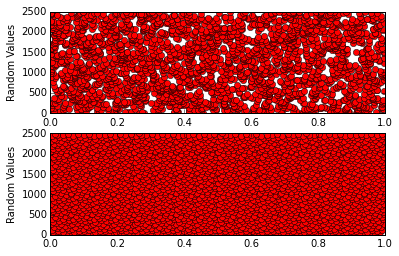

In [187]:
plt.figure(1)
plt.subplot(211)
plt.plot(randVal, range(numberOfValues), 'ro')
plt.ylabel('Random Values')
plt.subplot(212)
plt.plot(vdc, range(numberOfValues), 'ro')
plt.ylabel('Random Values')
plt.show()

[None, None]

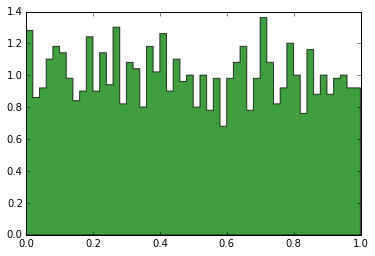

In [191]:
# the histogram of the data with histtype='step'
n, bins, patches = P.hist(randVal, 50, normed=1, histtype='stepfilled')
P.setp(patches, 'facecolor', 'g', 'alpha', 0.75)

[None, None]

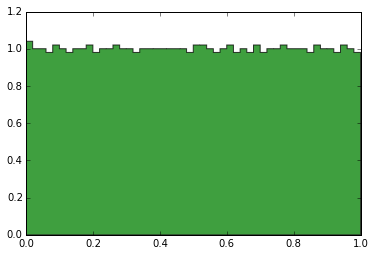

In [192]:
# the histogram of the data with histtype='step'
n, bins, patches = P.hist(vdc, 50, normed=1, histtype='stepfilled')
P.setp(patches, 'facecolor', 'g', 'alpha', 0.75)

## Here we stack the two histograms on top of each other

[None, None]

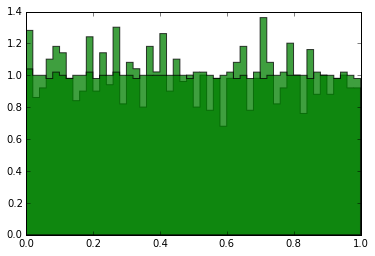

In [195]:
# the histogram of the data with histtype='step'
n, bins, patches = P.hist(randVal, 50, normed=1, histtype='stepfilled')
P.setp(patches, 'facecolor', 'g', 'alpha', 0.75)

# the histogram of the data with histtype='step'
n, bins, patches = P.hist(vdc, 50, normed=1, histtype='stepfilled')
P.setp(patches, 'facecolor', 'g', 'alpha', 0.75)

It is clear from these two histograms how much more evenly distributed the VDC value is over a "random" value.

The VDC value is the histogram in the foreground.